<center>
    <h1>Tema 2: Aprendizaje Supervisado</h1>
    <br/>
    <h1>Regularización I</h1>
    <br/>
    <h5>Prof. Wladimir Rodríguez</h5>
    <h5>wladimir@ula.ve</h5>
    <h5>Departamento de Computación</h5>
</center>

## Demostración de sobreajuste sobre datos sintéticos 

### Crear un conjunto de datos basado en una función sinusoidal

Veamos un conjunto de datos sintéticos que consta de 30 puntos extraídos de la sinusoide $y = \sin(4x)$:

In [2]:
import math
import random
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt

Crear valores aleatorios para x en el intervalo [0,1]

In [3]:
np.random.seed(98103)
n = 30
x = np.random.uniform(0, 1, size=n)
x = np.sort(x)

Calcular y. Y agregar ruido gaussiano aleatorio a y

In [7]:
def f(x):
    return np.sin(4 * x)
y = f(x) + np.random.normal(scale=0.3, size=n)

### Crear un dataframe de pandas.

In [8]:
data = pd.DataFrame({'x':x, 'y':y})
data.head()

,x,y
0,0.007306,-0.173523
1,0.031659,0.314089
2,0.036159,0.589634
3,0.052886,0.271321
4,0.140328,0.831607


### Crea una función para graficar los datos, ya que lo haremos muchas veces

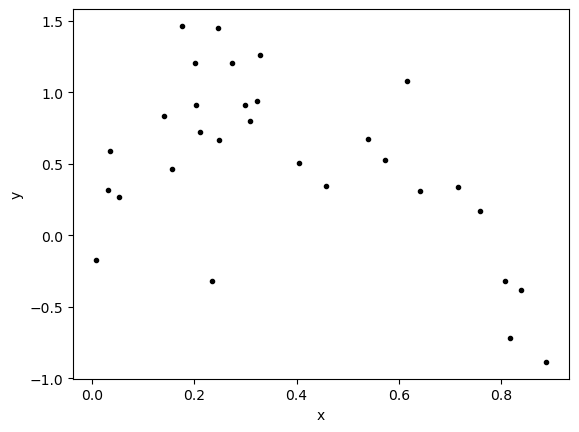

In [9]:
def graficar_data(data):    
    plt.plot(data['x'],data['y'],'k.')
    plt.xlabel('x')
    plt.ylabel('y')

graficar_data(data)

## Definir algunas funciones útiles para la regresión polinomial
Función para generar los dataframe polinomiales

In [10]:
def polinomial_dataframe(atributo, grado):
    # asumir que grado es >= 1
    # inicializar el DataFrame:
    poli_dataframe = pd.DataFrame()
    # fijar poli_dataframe['potencia_1'] igual al atributo pasado
    poli_dataframe['potencia_1'] = atributo
    # chequear si grado > 1
    if grado > 1:
        # realizar un lazo con los grados restantes:
        for potencia in range(2, grado+1): 
            # primero le damos el nombre a la columna:
            nombre = 'potencia_' + str(potencia)
            # luego asignamos a poli_dataframe[nombre] la potencia del atributo apropiada
            poli_dataframe[nombre] = atributo**potencia
    return poli_dataframe

Definir una función para ajustar un modelo de regresión lineal polinomial de grado "grado" a los datos en "data":

In [11]:
def regresion_polinomial(data, grado):
    poli_data_X = polinomial_dataframe(data.x, grado)
    modelo = LinearRegression()
    modelo.fit(poli_data_X, y)
    return modelo

Definir la función para graficar los datos y las predicciones hechas, ya que vamos a usarlo muchas veces.

In [12]:
def graficar_predicciones_poly(data, modelo):
    graficar_data(data)
    
    # Graficar la verdadera relación entre X e y
    x_v = np.random.uniform(0, 1, size=200)
    x_v = np.sort(x_v)
    y_v = f(x_v)
    plt.plot(x_v, y_v, 'r-', label='relación real')
    
    # Obtener el grado del polinomio
    grado = len(modelo.coef_)
    
    # Crear 200 puntos en el eje x axis y calcular la predicción para cada punto
    x = np.random.uniform(0, 1, size=200)
    x = np.sort(x)
    x_pred = pd.DataFrame({'x': x})
    y_pred = modelo.predict(polinomial_dataframe(x_pred.x,grado))
    
    # graficar predicciones
    plt.plot(x_pred.x, y_pred, 'g-', label='ajuste de grado ' + str(grado))
    plt.legend(loc='upper left')
    plt.axis([0,1,-1.5,2])

Cree una función que imprima los coeficientes polinomiales de una manera bonita :)

In [13]:
def imprimir_coefficientes(modelo):    
    # Obtener el grado del polinomio
    grado = len(modelo.coef_)

    # Obtener los parámetros aprendidos como una lista
    w = [modelo.intercept_]
    w += (modelo.coef_).tolist()
    # Numpy tiene un a función para imprimir polinomios de manera elegante
    # (La usaremos, pero necesita los parámetros en orden inverso)
    print ('Polinomio de grado ' + str(grado) + ':')
    w.reverse()
    print (np.poly1d(w))

## Ajustar un polinomio de grado 2

In [14]:
modelo = regresion_polinomial(data, grado=2)

Inspeccionar los parámetros aprendidos

In [15]:
imprimir_coefficientes(modelo)

Polinomio de grado 2:
        2
-6.079 x + 4.284 x + 0.1822


Formar y graficar nuestras predicciones a lo largo de una cuadrícula de valores x:

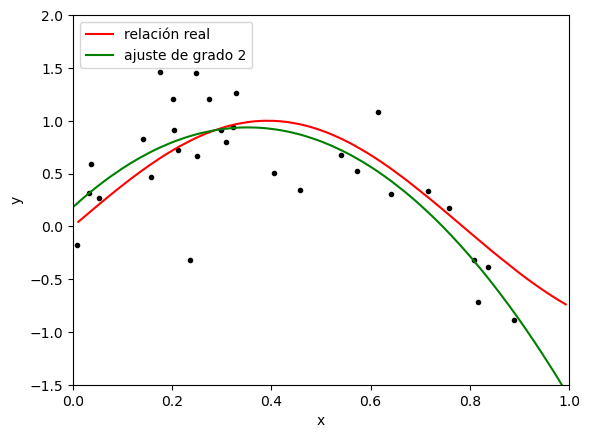

In [16]:
graficar_predicciones_poly(data, modelo)

## Calcular la media del error al cuadrado (MSE = mean squared error)

In [17]:
print('MSE = ', mean_squared_error(data.y, modelo.predict(polinomial_dataframe(data.x,2))))

MSE =  0.13424160429348567


## Ajustar un polinomio de grado 4

Polinomio de grado 4:
       4         3         2
-35.8 x + 63.21 x - 41.21 x + 10.7 x - 0.04815
MSE =  0.12327745833477893


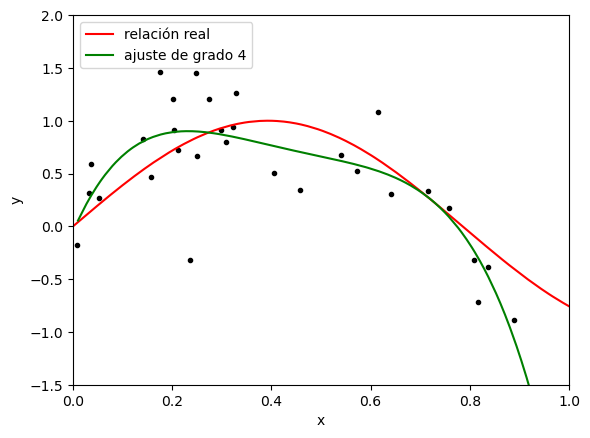

In [18]:
modelo = regresion_polinomial(data, grado=4)
imprimir_coefficientes(modelo)
graficar_predicciones_poly(data, modelo)
print('MSE = ', mean_squared_error(data.y, modelo.predict(polinomial_dataframe(data.x,4))))

## Ajustar un polinomio de grado 8

Polinomio de grado 8:
       8            7             6             5             4
-6146 x + 2.34e+04 x - 3.615e+04 x + 2.913e+04 x - 1.313e+04 x
         3         2
 + 3317 x - 457.9 x + 33.72 x - 0.3785
MSE =  0.11422489623029523


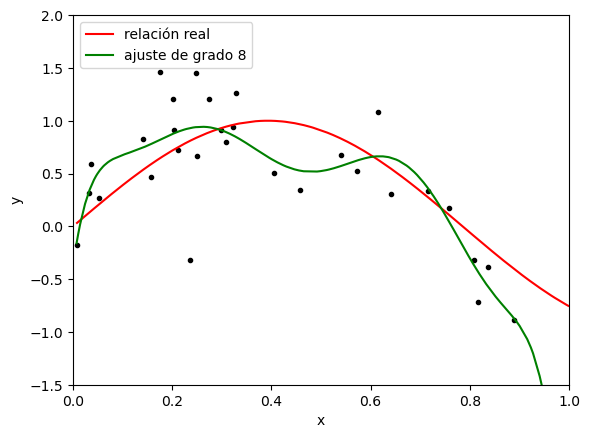

In [19]:
modelo = regresion_polinomial(data, grado=8)
imprimir_coefficientes(modelo)
graficar_predicciones_poly(data, modelo)
print('MSE = ', mean_squared_error(data.y, modelo.predict(polinomial_dataframe(data.x,8))))

## Ajustar un polinomio de grado 16

Polinomio de grado 16:
           16             15             14             13
3.439e+09 x  - 2.502e+10 x  + 8.285e+10 x  - 1.652e+11 x 
              12             11             10             9
 + 2.214e+11 x  - 2.104e+11 x  + 1.461e+11 x  - 7.504e+10 x
              8            7             6             5            4
 + 2.861e+10 x - 8.04e+09 x + 1.637e+09 x - 2.344e+08 x + 2.25e+07 x
              3             2
 - 1.344e+06 x + 4.421e+04 x - 648.8 x + 2.671
MSE =  0.09084523709383815


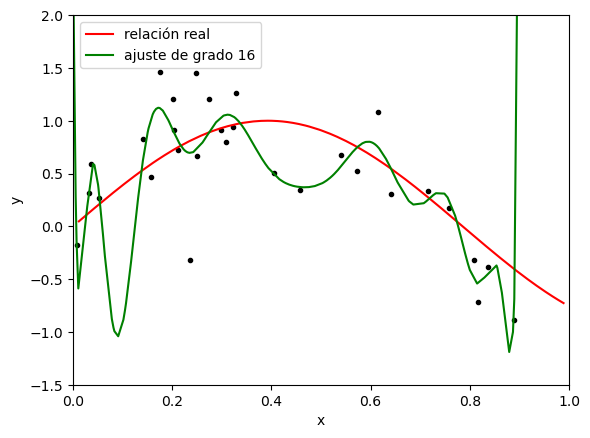

In [23]:
modelo = regresion_polinomial(data, grado=16)
imprimir_coefficientes(modelo)
graficar_predicciones_poly(data, modelo)
print('MSE = ', mean_squared_error(data.y, modelo.predict(polinomial_dataframe(data.x,16))))

Los coeficientes para el polinomio de grado 16 son de una magnitud altisima!!!!

## Demostración de sobreajuste sobre datos reales

En primer lugar, dividir los datos de ventas en cuatro subconjuntos de aproximadamente el mismo tamaño y llamarlos ventas_1, ventas_2, ventas_3 y ventas_4

In [22]:
ventas = pd.read_csv('../datos/kc_house_data.csv')
ventas = shuffle(ventas)

In [23]:
ventas_1 = ventas[:5403]
ventas_2 = ventas[5403:10806]
ventas_3 = ventas[10806:16209]
ventas_4 = ventas[16209:]

### Ajustar un modelo polinomial de grado 15 al conjunto ventas_1

In [24]:
X_1 = ventas_1.sort_values(['sqft_living', 'price'])
poli_data_X = polinomial_dataframe(X_1.sqft_living, 15)
y_1 = X_1.price

Polinomio de grado 15:
           15             14             13             12
4.436e-16 x  + 1.171e-16 x  + 9.401e-16 x  + 6.762e-16 x 
              11             10             9            8
 + 3.945e-16 x  - 1.054e-15 x  + 3.886e-16 x + 2.31e-16 x
              7             6             5             4             3
 - 1.276e-15 x - 5.482e-16 x - 5.953e-14 x - 6.961e-10 x + 7.727e-06 x
            2
 + 0.03339 x + 1.334e-05 x + 2.928e+05

MSE =  58993462210.46738
RMSE =  242885.69783020855


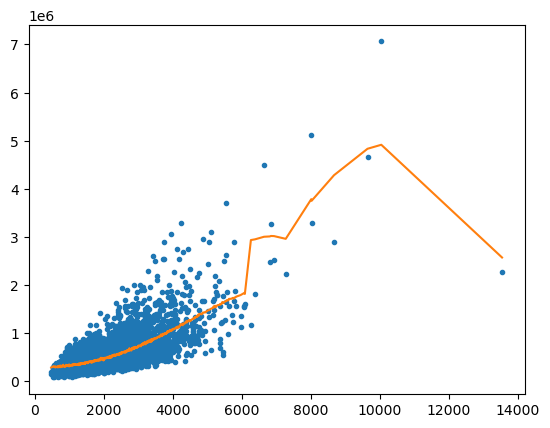

In [25]:
modelo = LinearRegression()
modelo.fit(poli_data_X, y_1)
imprimir_coefficientes(modelo)
print()
mse = mean_squared_error(y_1, modelo.predict(poli_data_X))
print('MSE = ', mse)
print('RMSE = ', math.sqrt(mse))
plt.plot(poli_data_X['potencia_1'],y_1,'.',
        poli_data_X['potencia_1'], modelo.predict(poli_data_X),'-')

### Ajustar un modelo polinomial de grado 15 al conjunto ventas_2

In [26]:
X_2 = ventas_2.sort_values(['sqft_living', 'price'])
poli_data_X_2 = polinomial_dataframe(X_2.sqft_living, 15)
y_2 = X_2.price

Polinomio de grado 15:
           15             14             13             12
1.767e-16 x  - 3.351e-16 x  + 4.858e-16 x  + 7.422e-16 x 
              11             10             9             8
 - 4.287e-16 x  + 4.705e-17 x  + 3.725e-16 x + 7.815e-16 x
              7             6             5             4             3
 - 6.106e-17 x - 6.363e-16 x + 9.789e-15 x + 3.143e-10 x - 4.831e-06 x
            2
 + 0.06632 x + 2.75e-05 x + 2.497e+05

MSE =  60666952627.18499
RMSE =  246306.62318984643


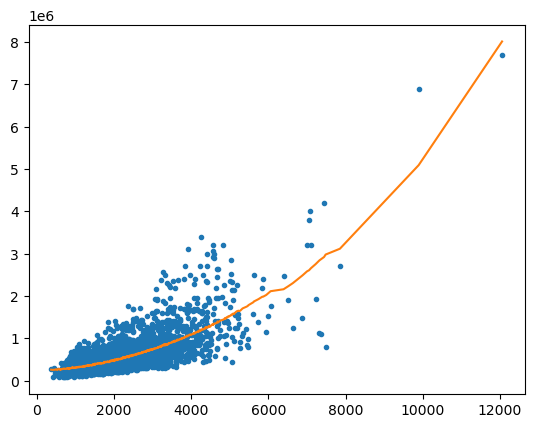

In [27]:
modelo = LinearRegression()
modelo.fit(poli_data_X_2, y_2)
imprimir_coefficientes(modelo)
print()
mse = mean_squared_error(y_2, modelo.predict(poli_data_X_2))
print('MSE = ', mse)
print('RMSE = ', math.sqrt(mse))
plt.plot(poli_data_X_2['potencia_1'],y_2,'.',
        poli_data_X_2['potencia_1'], modelo.predict(poli_data_X_2),'-')

### Ajustar un modelo polinomial de grado 15 al conjunto ventas_3

In [28]:
X_3 = ventas_3.sort_values(['sqft_living', 'price'])
poli_data_X_3 = polinomial_dataframe(X_3.sqft_living, 15)
y_3 = X_3.price

Polinomio de grado 15:
           15             14             13             12
4.167e-16 x  - 1.301e-15 x  + 6.515e-16 x  + 1.164e-15 x 
              11             10             9             8
 + 4.137e-16 x  + 2.076e-16 x  - 6.149e-16 x + 4.801e-16 x
              7             6             5             4             3
 - 6.725e-16 x + 2.518e-16 x - 3.459e-14 x - 1.807e-09 x + 1.593e-05 x
            2
 + 0.02091 x + 1.079e-05 x + 2.962e+05

MSE =  58377783998.93396
RMSE =  241614.94986638133


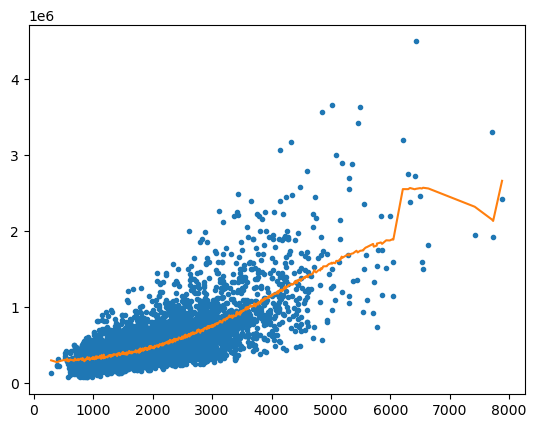

In [29]:
modelo = LinearRegression()
modelo.fit(poli_data_X_3, y_3)
imprimir_coefficientes(modelo)
print()
mse = mean_squared_error(y_3, modelo.predict(poli_data_X_3))
print('MSE = ', mse)
print('RMSE = ', math.sqrt(mse))
plt.plot(poli_data_X_3['potencia_1'],y_3,'.',
        poli_data_X_3['potencia_1'], modelo.predict(poli_data_X_3),'-')

### Ajustar un modelo polinomial de grado 15 al conjunto ventas_4

In [30]:
X_4 = ventas_4.sort_values(['sqft_living', 'price'])
poli_data_X_4 = polinomial_dataframe(X_4.sqft_living, 15)
y_4 = X_4.price

Polinomio de grado 15:
            15             14             13             12
-3.339e-16 x  + 7.907e-17 x  - 1.819e-16 x  + 2.758e-16 x 
              11             10             9             8
 + 2.812e-16 x  - 1.284e-16 x  - 7.561e-16 x - 2.163e-17 x
              7             6             5             4             3
 - 1.848e-16 x + 3.684e-16 x + 1.986e-14 x + 4.276e-10 x - 4.393e-06 x
            2
 + 0.06309 x + 3.042e-05 x + 2.561e+05

MSE =  64208543776.01109
RMSE =  253394.04842263184


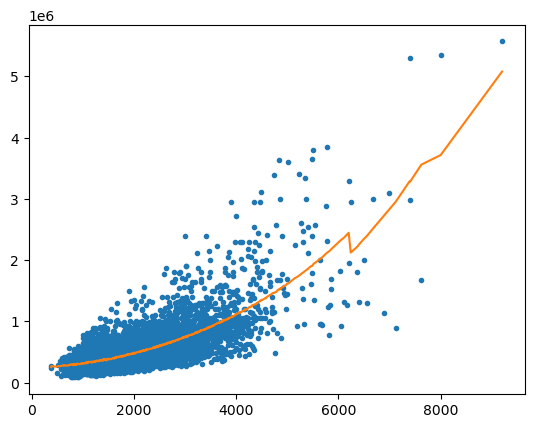

In [31]:
modelo = LinearRegression()
modelo.fit(poli_data_X_4, y_4)
imprimir_coefficientes(modelo)
print()
mse = mean_squared_error(y_4, modelo.predict(poli_data_X_4))
print('MSE = ', mse)
print('RMSE = ', math.sqrt(mse))
plt.plot(poli_data_X_4['potencia_1'],y_4,'.',
        poli_data_X_4['potencia_1'], modelo.predict(poli_data_X_4),'-')

# Regresión Ridge

La Regresión Ridge tiene como objetivo evitar el sobreajuste añadiendo un coste al término RSS de mínimos cuadrados estándar que depende de la norma 2 de los coeficientes $\| w \|$. El resultado es penalizar ajustes con grandes coeficientes. La fuerza de esta penalización, y por lo tanto el balance de complejidad vs. complejidad del modelo, se controla mediante un parámetro $\alpha$ (aquí llamado "Penalidad_L2").

  $J(\boldsymbol\beta) = \frac{1}{n}\sum_{i=0}^n (y_i - \boldsymbol\beta^T \mathbf{x}_i')^2 + \alpha \|\boldsymbol\beta\|_2$
  
 - $\alpha$ = 0:
         El objetivo se vuelve igual que la simple regresión lineal.
         Obtendremos los mismos coeficientes que la regresión lineal simple.
         
 - $\alpha = \infty$:
         Los coeficientes serán cero. ¿Por qué? Debido a una ponderación infinita del cuadrado de coeficientes, cualquier cosa menos de cero hará que el objetivo sea infinito.
         
 - $0 < \alpha < \infty$:
         La magnitud de $\alpha$ determinará la ponderación dada a diferentes partes del objetivo.
         Los coeficientes estarán entre 0 y unos para la regresión lineal simple.


In [26]:
from sklearn.linear_model import Ridge

Definir nuestra función para resolver el objetivo de la Regresión Ridge para un modelo de regresión polinomial de cualquier grado:

In [27]:
def regresion_ridge_polinomial(data, grado, penalidad_l2):
    poli_data_X = polinomial_dataframe(data.x, grado)
    modelo = Ridge(alpha=penalidad_l2)
    modelo.fit(poli_data_X, y)
    return modelo

## Realizar un ajuste de Regresion Ridge de un polinomio de grado 16 usando una penalidad muy pequeña

In [28]:
modelo = regresion_ridge_polinomial(data, grado=16, penalidad_l2=1e-25)
imprimir_coefficientes(modelo)

Polinomio de grado 16:
           16             15             14             13
2.673e+09 x  - 1.961e+10 x  + 6.548e+10 x  - 1.317e+11 x 
              12             11             10             9
 + 1.779e+11 x  - 1.705e+11 x  + 1.194e+11 x  - 6.182e+10 x
              8             7             6             5             4
 + 2.376e+10 x - 6.727e+09 x + 1.379e+09 x - 1.986e+08 x + 1.915e+07 x
              3             2
 - 1.145e+06 x + 3.754e+04 x - 543.9 x + 2.191


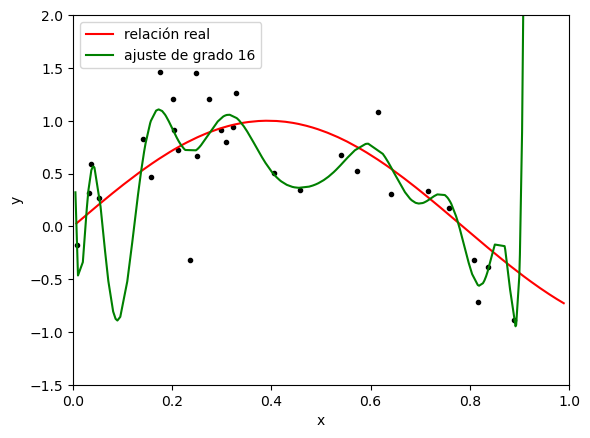

In [29]:
graficar_predicciones_poly(data, modelo)

## Realizar un ajuste de Regresion Ridge de un polinomio de grado 16 usando una penalidad alta

In [30]:
modelo = regresion_ridge_polinomial(data, grado=16, penalidad_l2=100)
imprimir_coefficientes(modelo)

Polinomio de grado 16:
           16            15            14            13            12
-0.003191 x  - 0.003708 x  - 0.004315 x  - 0.005029 x  - 0.005873 x 
             11            10            9          8           7
 - 0.006869 x  - 0.008048 x  - 0.009444 x - 0.0111 x - 0.01306 x
            6           5           4           3           2
 - 0.01537 x - 0.01806 x - 0.02111 x - 0.02425 x - 0.02625 x - 0.02214 x + 0.5299


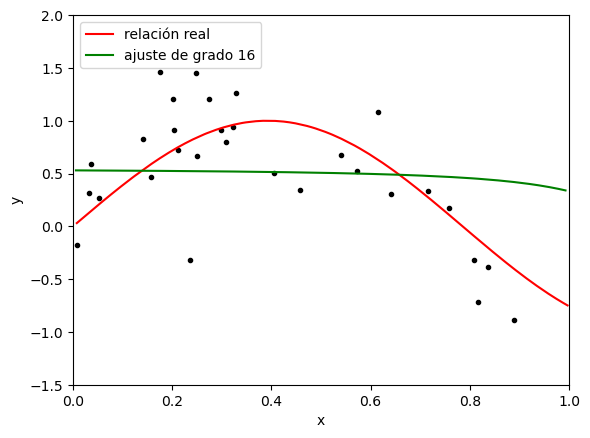

In [31]:
graficar_predicciones_poly(data, modelo)

## Veamos los ajustes para una secuencia de valores alfa en aumento

alpha = 1.00e-25
Polinomio de grado 16:
           16             15             14             13
2.673e+09 x  - 1.961e+10 x  + 6.548e+10 x  - 1.317e+11 x 
              12             11             10             9
 + 1.779e+11 x  - 1.705e+11 x  + 1.194e+11 x  - 6.182e+10 x
              8             7             6             5             4
 + 2.376e+10 x - 6.727e+09 x + 1.379e+09 x - 1.986e+08 x + 1.915e+07 x
              3             2
 - 1.145e+06 x + 3.754e+04 x - 543.9 x + 2.191


alpha = 1.00e-10
Polinomio de grado 16:
      16         15        14        13         12        11        10
1423 x  - 890.9 x  - 1825 x  - 1035 x  + 844.3 x  + 2312 x  + 1827 x 
          9        8        7        6        5        4        3
 - 712.4 x - 2934 x - 1575 x + 2464 x + 2151 x - 3183 x + 1363 x
          2
 - 270.1 x + 26.74 x - 0.3141


alpha = 1.00e-06
Polinomio de grado 16:
        16         15         14         13         12        11
-31.75 x  - 5.667 x  + 15.06 x  + 27.51

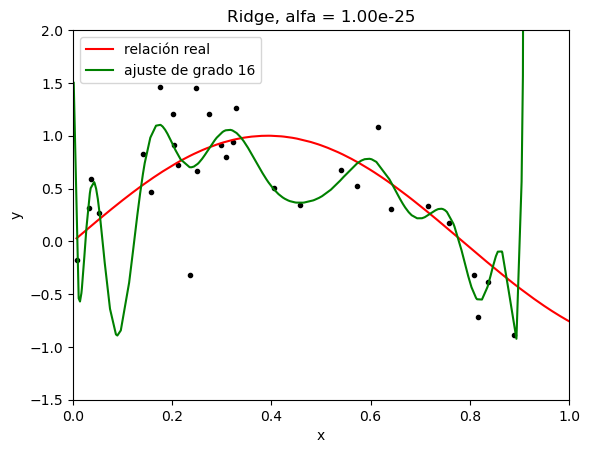

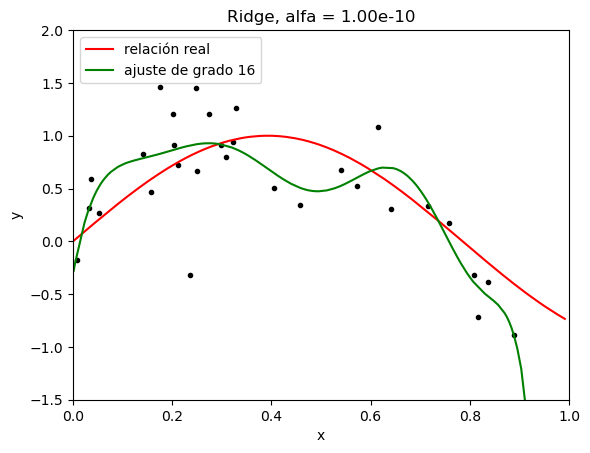

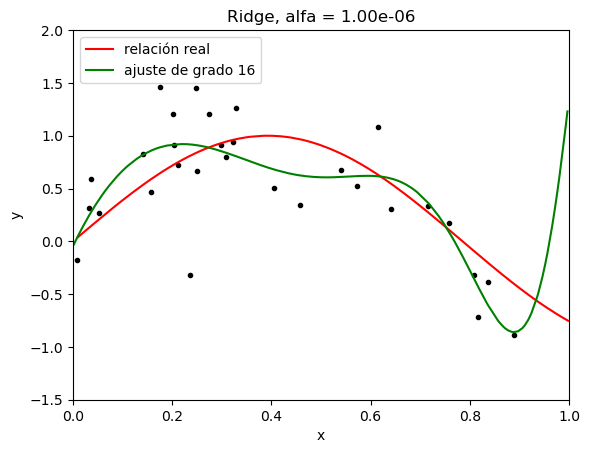

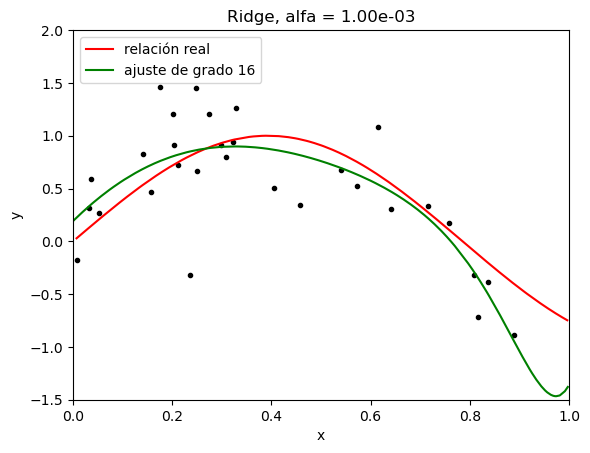

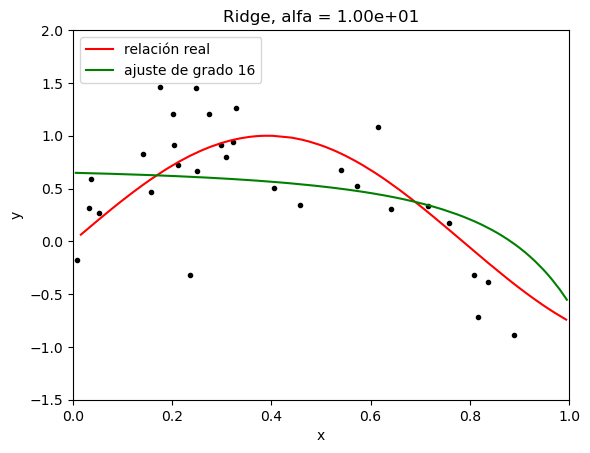

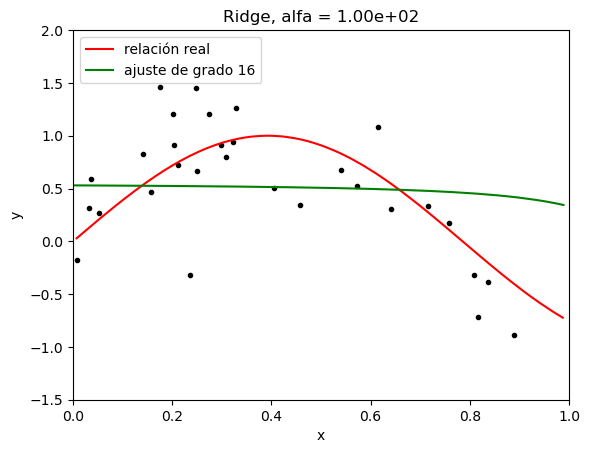

In [32]:
for alfa in [1e-25, 1e-10, 1e-6, 1e-3, 1e1, 1e2]:
    modelo = regresion_ridge_polinomial(data, grado=16, penalidad_l2=alfa)
    print ('alpha = %.2e' % alfa)
    imprimir_coefficientes(modelo)
    print ('\n')
    plt.figure()
    graficar_predicciones_poly(data, modelo)
    plt.title('Ridge, alfa = %.2e' % alfa)

# Regresión Lasso

La Regresión Lasso reduce conjuntamente los coeficientes para evitar el ajuste excesivo, e implica implícitamente la selección de los atributos estableciendo algunos coeficientes exactamente a 0 para una fuerza de penalidad suficientemente grande alfa (aquí llamada "penalidad_L1"). En particular, Lasso toma el término RSS de los mínimos cuadrados estándar y añade un coste de norma 1 de los coeficientes $\|w \|$.

In [33]:
from sklearn.linear_model import Lasso

Definir nuestra función para resolver el objetivo de la Regresión Lasso para un modelo de regresión polinomial de cualquier grado:

In [34]:
def regresion_lasso_polinomial(data, grado, penalidad_l1):
    poli_data_X = polinomial_dataframe(data.x, grado)
    modelo = Lasso(alpha=penalidad_l1)
    modelo.fit(poli_data_X, y)
    return modelo

## Explore la solución de la Regresión Lasso en función de diferentes valores de alfa

alpha = 1.00e-04
Polinomio de grado 16:
         9         8     7     6         4         3         2
-0.7024 x - 2.062 x - 0 x - 0 x + 1.856 x + 1.492 x - 8.141 x + 4.647 x + 0.1847


alpha = 1.00e-03
Polinomio de grado 16:
         6     5     4         3         2
-0.1201 x - 0 x - 0 x - 2.155 x - 2.688 x + 2.846 x + 0.3196


alpha = 1.00e-02
Polinomio de grado 16:
        4     3     2
-2.155 x - 0 x - 0 x + 0.7361


alpha = 1.00e-01
Polinomio de grado 16:
 
0.5052


alpha = 1.00e+01
Polinomio de grado 16:
 
0.5052




/Users/wladimir/miniforge3/envs/AA2024/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.345e-01, tolerance: 1.086e-03
  model = cd_fast.enet_coordinate_descent(
/Users/wladimir/miniforge3/envs/AA2024/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.490e-03, tolerance: 1.086e-03
  model = cd_fast.enet_coordinate_descent(


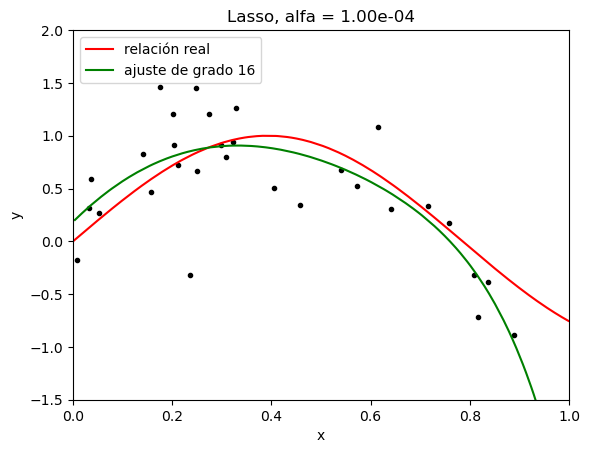

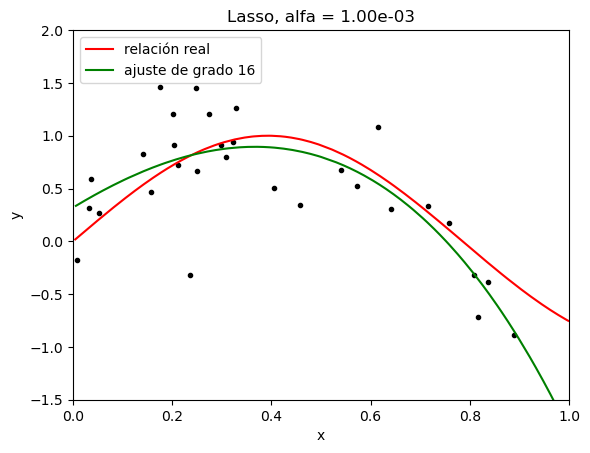

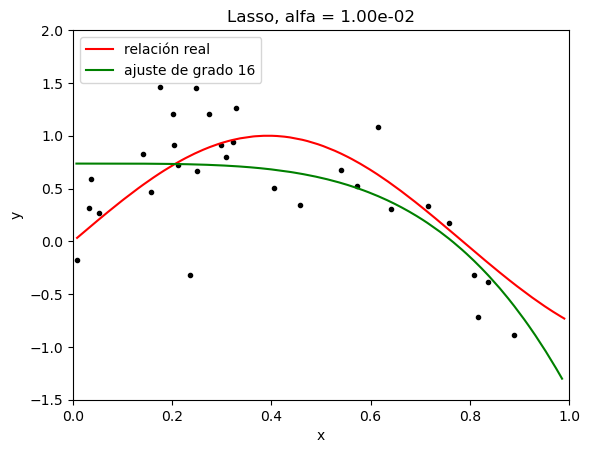

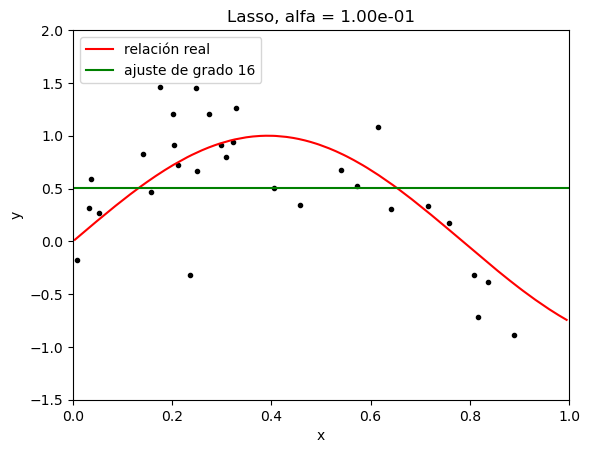

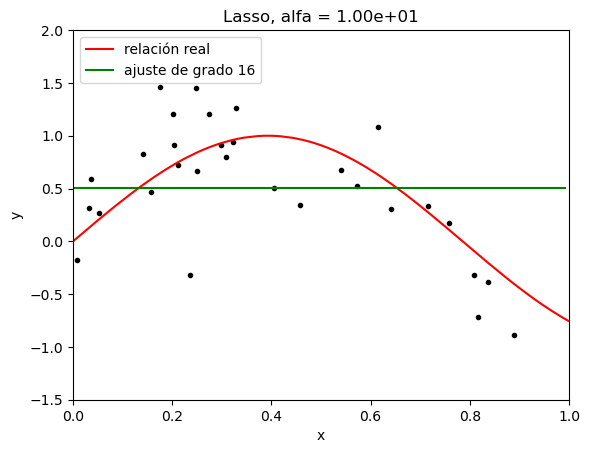

In [35]:
for alfa in [0.0001, 0.001, 0.01, 0.1, 10]:
    modelo = regresion_lasso_polinomial(data, grado=16, penalidad_l1=alfa)
    print ('alpha = %.2e' % alfa)
    imprimir_coefficientes(modelo)
    print ('\n')
    plt.figure()
    graficar_predicciones_poly(data, modelo)
    plt.title('Lasso, alfa = %.2e' % alfa)